# EMA Experimentation Multiprocessing

First version of how experiments can be performed using Multiprocessing in EMA for the migration model. 

The model also requires the model and the data files to be in the same folder as this notebook.

# 1. Importing the required Python packages

In [1]:
from ema_workbench import(Model, RealParameter,Constant,IntegerParameter,CategoricalParameter) 
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.em_framework.evaluators import LHS, SOBOL
import timeit
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.analysis.plotting import envelopes
#from ema_workbench.analysis.plotting_util import KDE
import pandas as pd
import numpy as np

C:\Users\anton\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\anton\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\anton\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\anton\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\anton\Anaconda3\lib\importlib\_bootstrap.py:219: Impor

In [2]:
#Sub-library of matplotlib. We use the '%' sign to define the graphs we
#want to call as we perform experiments.
%matplotlib inline
#Provides a MATLAB-like plotting framework for data analytics and image
#processing to produce figures in the notebook.
import matplotlib.pyplot as plt
#Not necessary for analysis (as we use it), but it allows us to change
#colours in graphs.
import seaborn as sns
#Used to create and manage N-dimensional array objects and random number
#capabilities.
import numpy as np
#Used for data structures and data analysis to manage Microsoft Excel-like
#structures.
import pandas as pd
#Running System Dynamics models in python.
import pysd
#Use operating system dependent functionality to manipulate paths - to
#save/load files. This is important when copying this code or replicating
#the experiments so we don't have to develop new paths.
import os
#Used for designing experiments and the performing of experiments.
import ema_workbench
from ema_workbench import (Model,
 IntegerParameter,
RealParameter,
ScalarOutcome,
Constant,
perform_experiments,
save_results,
load_results,
TimeSeriesOutcome,
Policy
 )
from ema_workbench.em_framework import samplers, util
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.connectors.pysd_connector import PysdModel
from ema_workbench.analysis.plotting import (lines, kde_over_time)
 
from ema_workbench.analysis.pairs_plotting import (pairs_lines,pairs_scatter,pairs_density)
from ema_workbench.analysis import plotting
from ema_workbench.analysis import plotting_util


# 2.Specify uncertainties and outcomes

In [4]:
from __future__ import (division, unicode_literals, absolute_import,
                        print_function)



#Import and turn on logging to view EMA process run. This is so that we
#get updates during experiments.
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench.connectors.vensim import VensimModel


if __name__ == "__main__":
     #turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO)

    # instantiate a model
    wd = r'C:\Users\anton\Downloads\Final Model'
    vensimModel = VensimModel("WholeModel14",wd=wd,
                              model_file=r'WholeModel14.vpm')
    

    vensimModel.uncertainties = [
                                 
                                     RealParameter("depreciation rate",0.075,0.125),
                                     RealParameter("inflation rate", 0,0.03),
                                     RealParameter("labor force participation rate", 0.6,0.8),
                                     RealParameter("average hiring time for new workforce", 0.5,1),
                                     RealParameter("average firing time workforce", 1,1.5),
                                     RealParameter("propensity to save",0.05,0.1),
                                     RealParameter("growth rate EU", 0.01,0.03),
                                     RealParameter("GDP deflator EU", 1,1.2),
                                     RealParameter("import income elasticity", 1,2),
                                     RealParameter("export income elasticity", 1,2),
                                     RealParameter("interest rate as percentage of GDP", 0.01,0.05),
                                     RealParameter("average fertility per woman", 1.2,2.1),
                                     RealParameter("percentage public employees", 0.1,0.2),
                                     RealParameter("productivity growth factor", -0.01,0.03),
                                     RealParameter("investments as percentage of profit", 0.2,0.5),
                                     
                                  ]
    

    vensimModel.outcomes = [TimeSeriesOutcome('real GDP'),
                            TimeSeriesOutcome('profit'),
                            TimeSeriesOutcome('Gross capital formation companies'),
                            TimeSeriesOutcome('gross capital formation government'),
                            TimeSeriesOutcome('real disposable income'),
                            TimeSeriesOutcome('Public Budget Balance including interest payments'),
                            TimeSeriesOutcome('unemployment rate')
                            
                           ]
    


    
    
    
    

# 3. Specify the policies and run the experiments

In [5]:
import timeit

policies=[Policy('Lower taxes',**{"corporate profit tax rate": 0.25,
                                     "tax rate on personal income":0.2,
                                      "value added tax rate":0.2,
                                      "public investments as a ratio of public budget balance":0.4}),

          Policy('Higher taxes',**{"corporate profit tax rate": 0.35,
                                     "tax rate on personal income":.4,
                                     "value added tax rate":.25,
                                     "public investments as a ratio of public budget balance":0.8})]

start_time = timeit.default_timer()

N_SCENARIOS = 5000

results = perform_experiments(vensimModel, N_SCENARIOS, policies=policies)

elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", round(elapsed/60))

[MainProcess/INFO] performing 5000 scenarios * 2 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished


Total time in minutes: 44


In [6]:
from ema_workbench import save_results, load_results
save_results(results, r'./results.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\anton\Downloads\Final Model\results.tar.gz


In [5]:
file_name = "results.tar.gz"
experiments, outcomes = load_results(file_name)

In [8]:
print(list(outcomes.keys()))

['TIME', 'real GDP', 'profit', 'Gross capital formation companies', 'gross capital formation government', 'real disposable income', 'Public Budget Balance including interest payments', 'unemployment rate']


In [6]:
results=experiments
print(type(experiments))
print(type(outcomes))
print(type(results))

<class 'pandas.core.frame.DataFrame'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


# 4.Visualization of the results

In [10]:
#outcomes.keys()

In [11]:
#pd.DataFrame(outcomes["real GDP"]).shape

In [13]:
# fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='Public budget balance as percentage of GDP',density=plotting_util.Density.KDE,group_by='policy')
# fig.set_size_inches(12,5)
# plt.show()

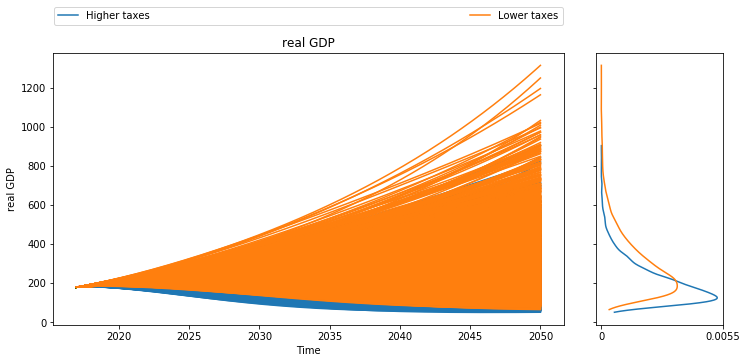

In [14]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='real GDP',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

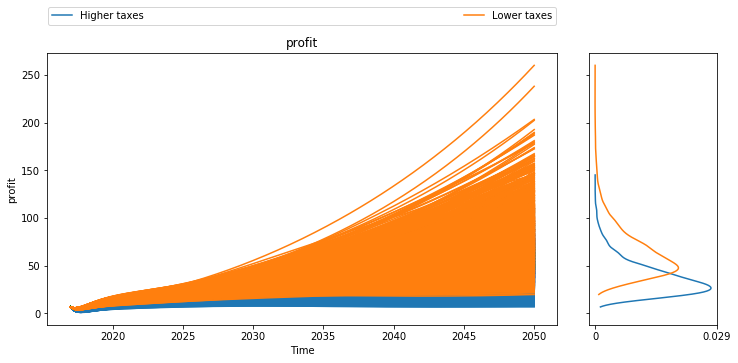

In [16]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='profit',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

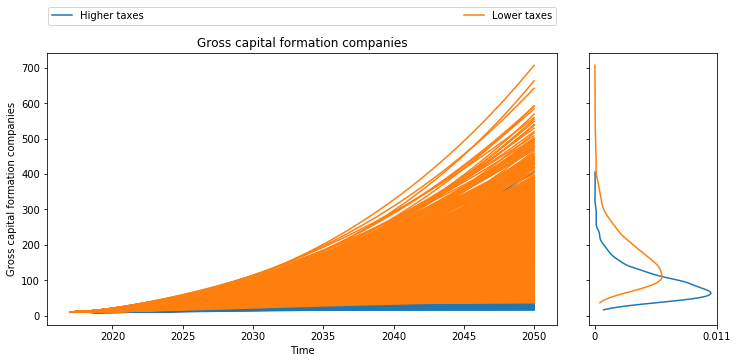

In [17]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='Gross capital formation companies',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

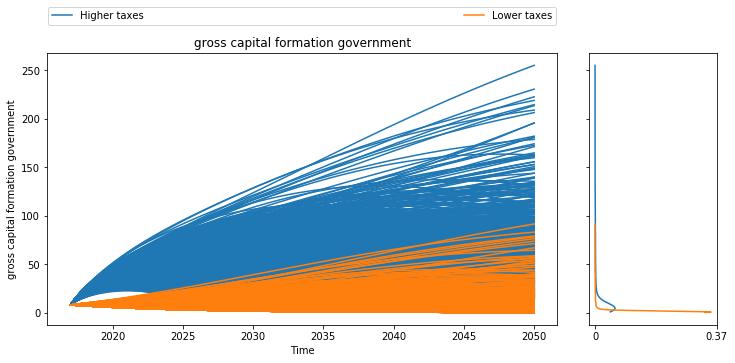

In [18]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='gross capital formation government',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

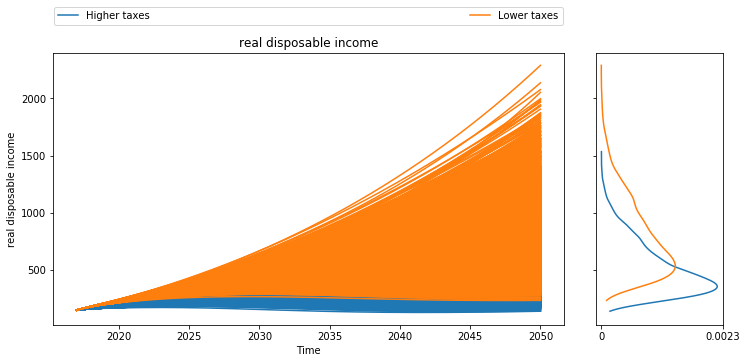

In [19]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='real disposable income',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

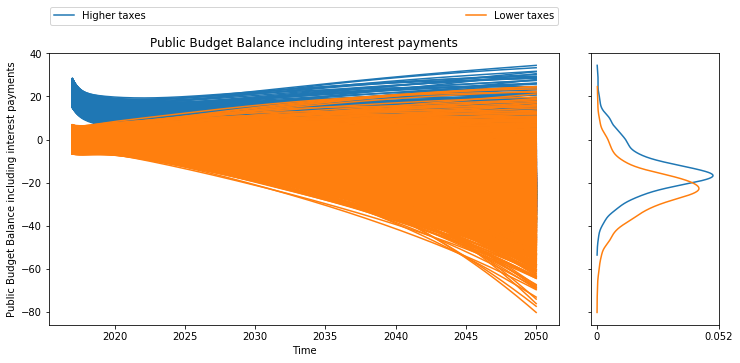

In [20]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='Public Budget Balance including interest payments',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

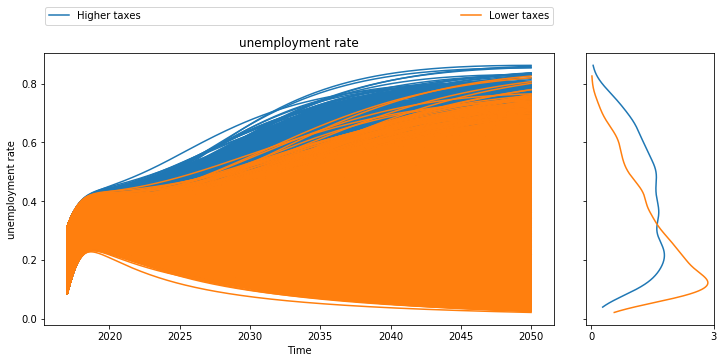

In [21]:
fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show='unemployment rate',density=plotting_util.Density.KDE,group_by='policy')
fig.set_size_inches(12,5)
plt.show()

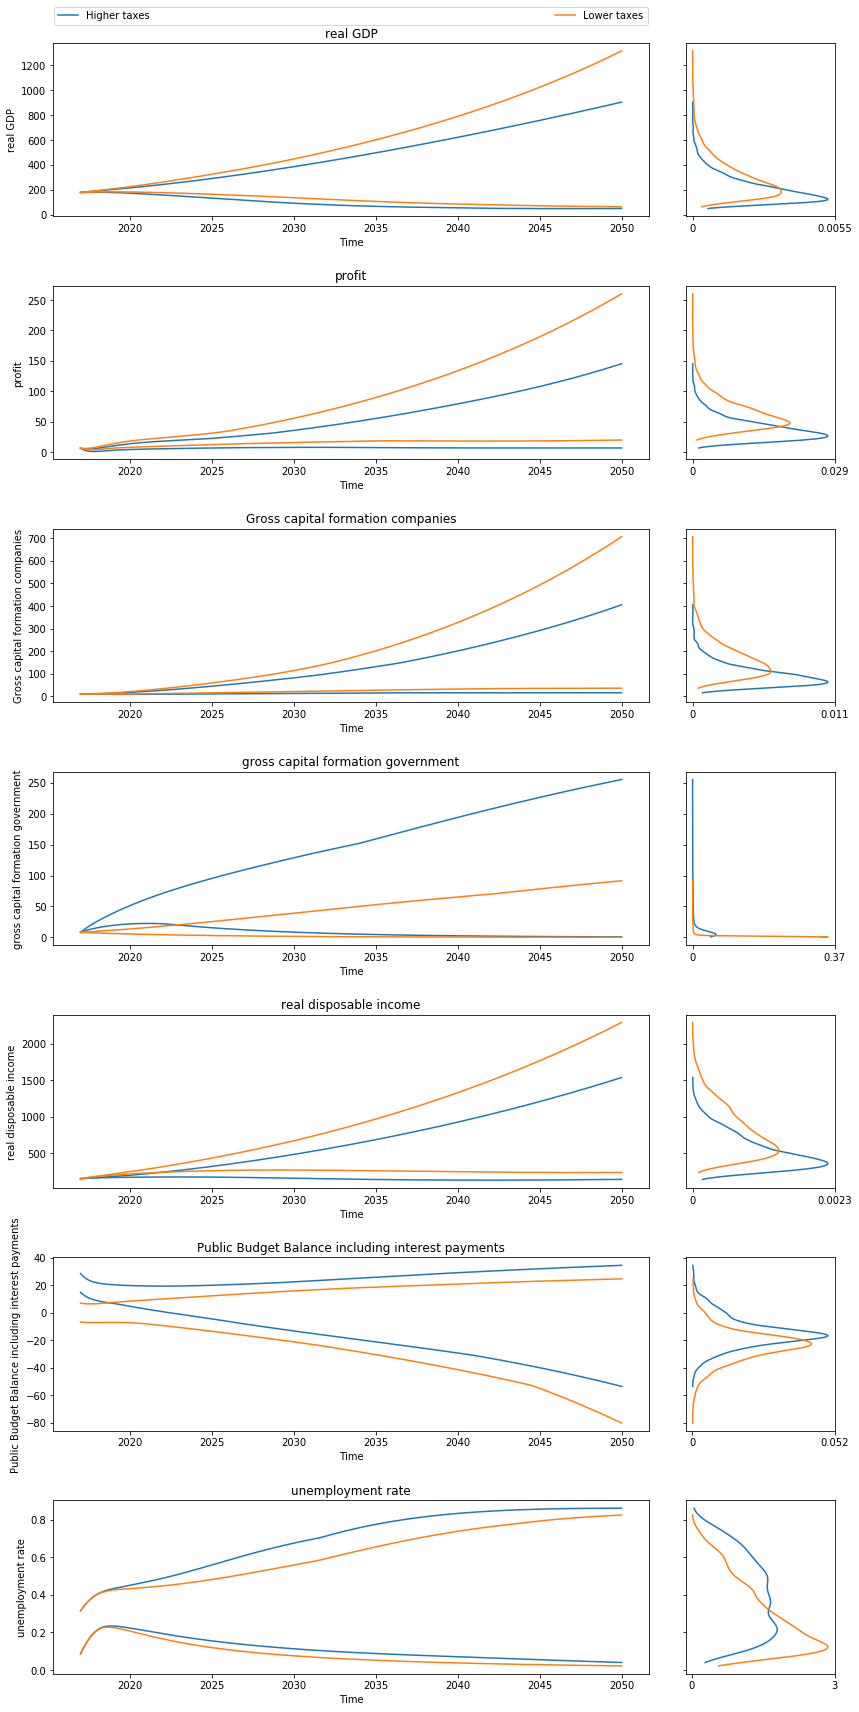

In [22]:
from ema_workbench.analysis import plotting
from ema_workbench.analysis import plotting_util
fig, axes = plotting.envelopes(results,outcomes,density=plotting_util.Density.KDE, group_by='policy')
fig.set_figheight(30)
fig.set_figwidth(14)
plt.show()

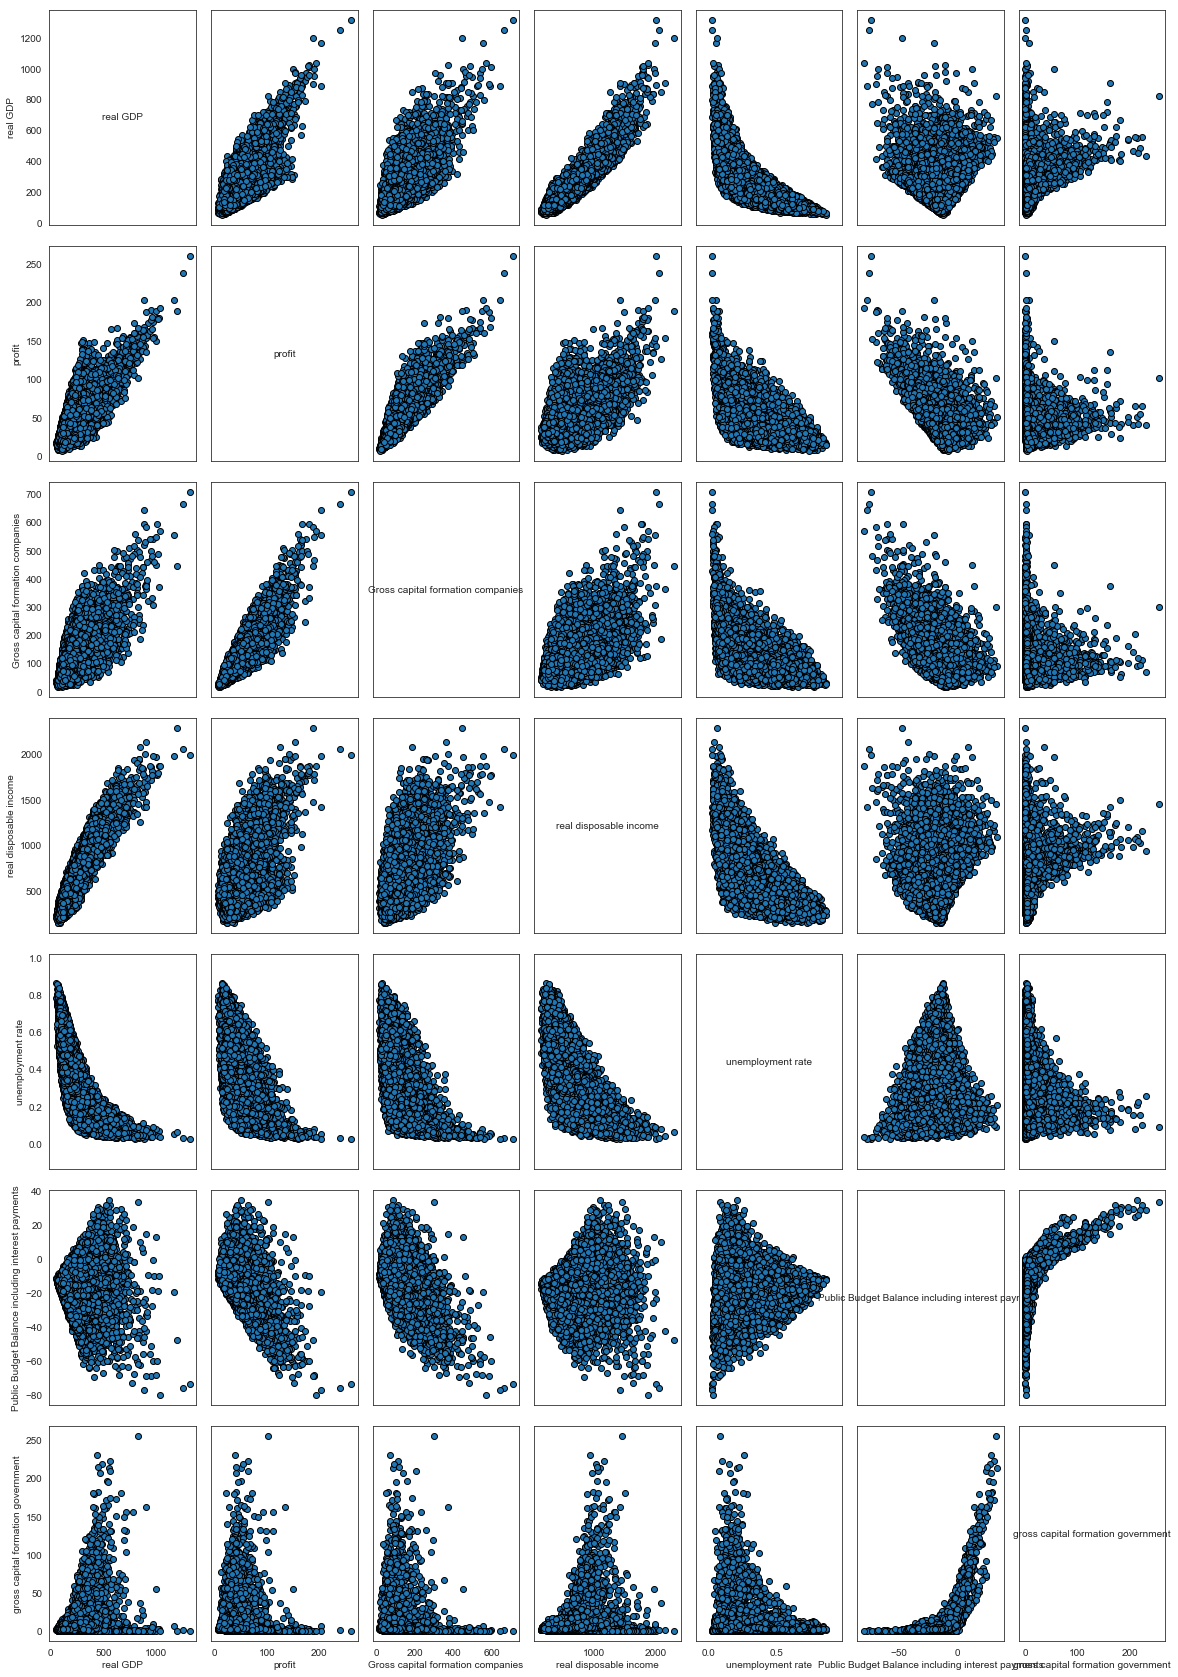

In [63]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=['real GDP',
                                                             'profit',
                                                             'Gross capital formation companies',
                                                             'real disposable income',
                                                             'unemployment rate',
                                                             'Public Budget Balance including interest payments',
                                                             'gross capital formation government'
                                                            ],group_by=None)
fig.set_figheight(30)
fig.set_figwidth(20)
plt.show()

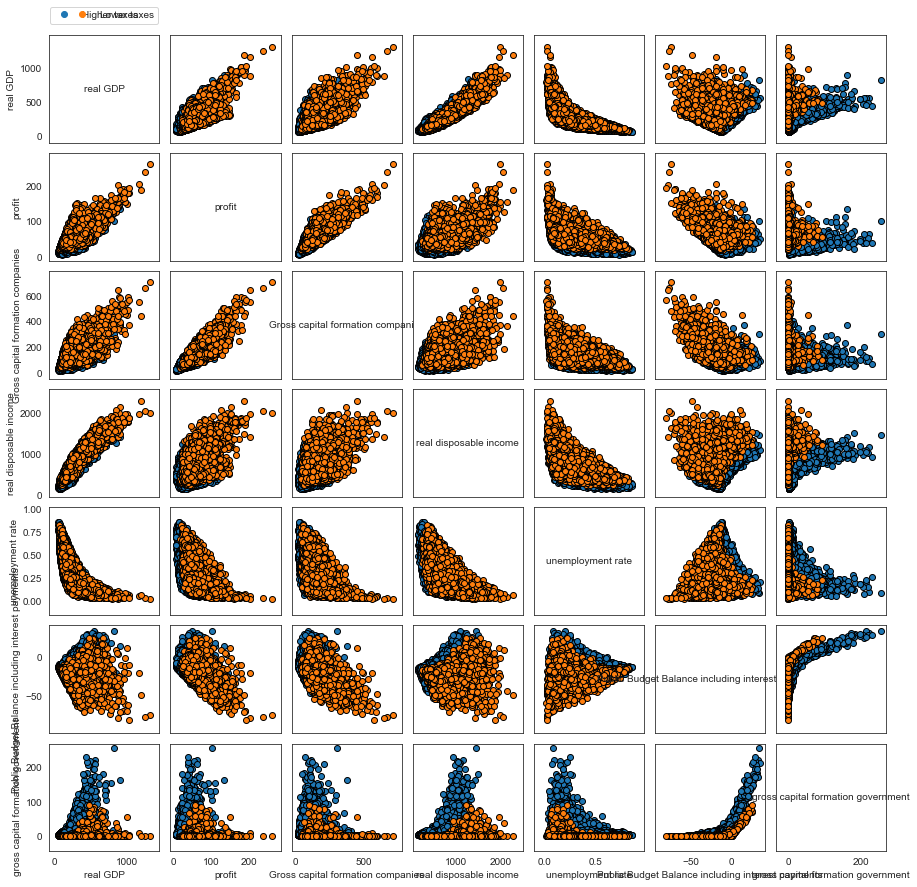

In [64]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=['real GDP',
                                                             'profit',
                                                             'Gross capital formation companies',
                                                             'real disposable income',
                                                             'unemployment rate',
                                                             'Public Budget Balance including interest payments',
                                                             'gross capital formation government'
                                                             ],group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [209]:
#'real GDP'
# 'profit',
#'Gross capital formation companies',
# 'real disposable income',
#'unemployment rate',
#'Public Budget Balance including interest payments',
#'gross capital formation government'

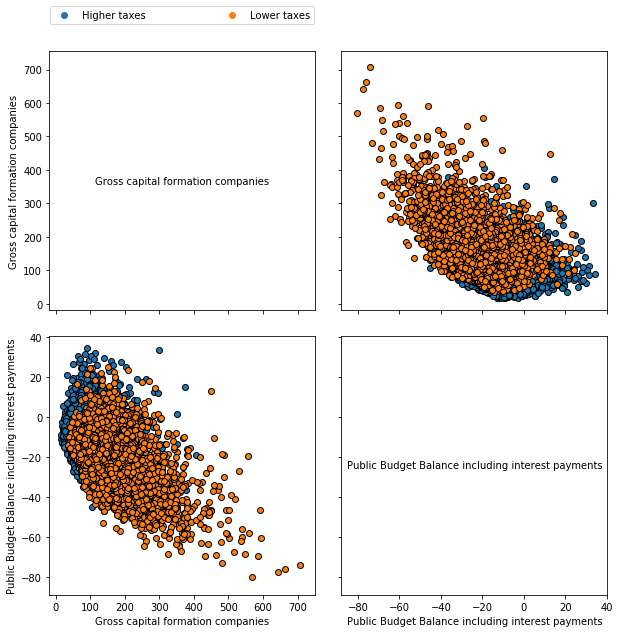

In [8]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=[
                                                             'Gross capital formation companies',
                                                             'Public Budget Balance including interest payments' 
                                                             ],group_by='policy')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

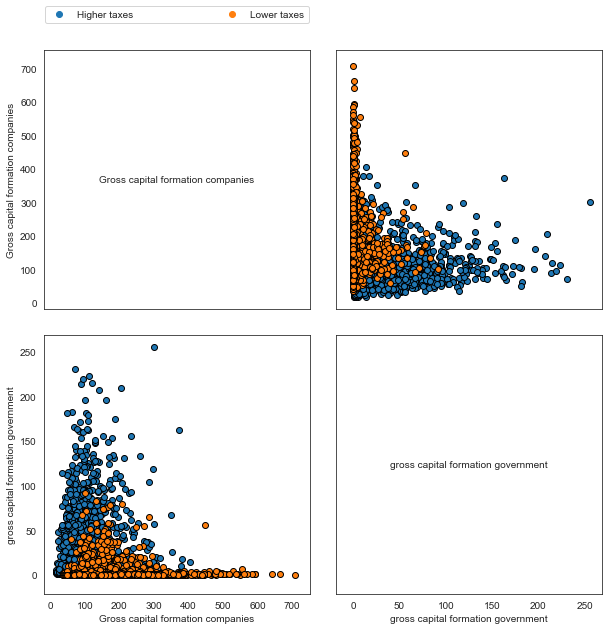

In [211]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=[
                                                             'Gross capital formation companies',
                                                             'gross capital formation government' 
                                                             ],group_by='policy')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

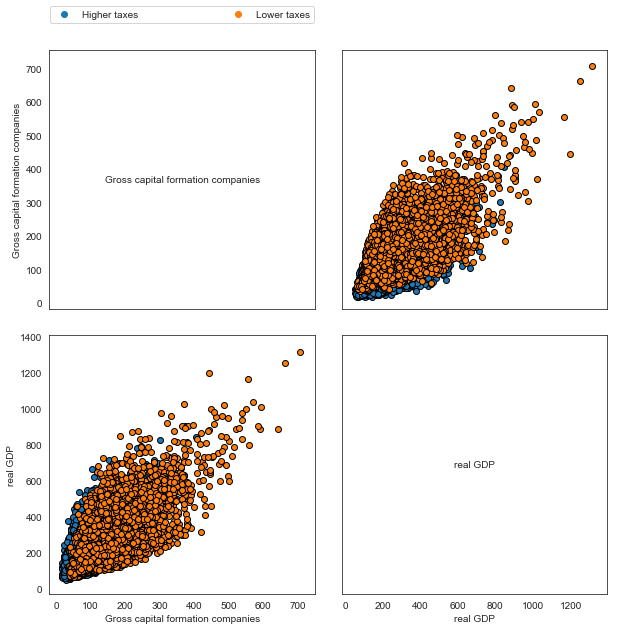

In [207]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=[
                                                             'Gross capital formation companies',
                                                             'real GDP' 
                                                             ],group_by='policy')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

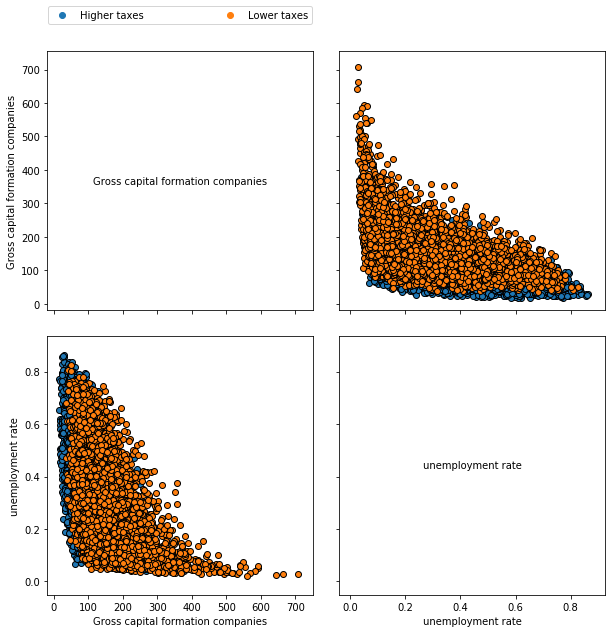

In [9]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=[
                                                             'Gross capital formation companies',
                                                             'unemployment rate' 
                                                             ],group_by='policy')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

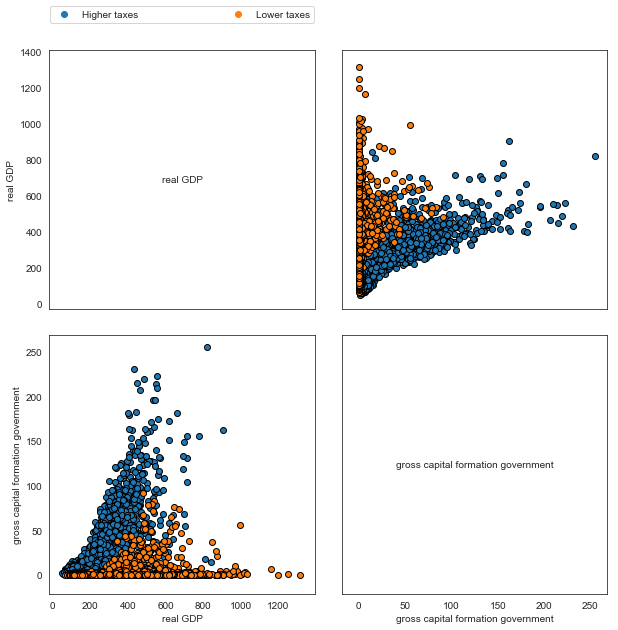

In [70]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=[
                                                             'Gross capital formation companies',
                                                             'gross capital formation government' 
                                                             ],group_by='policy')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

# 5. Reflection of  results

From the analysis conducted above it can be clearly seen that a **reduction of taxes**

i)leads higher values of:
       
       a) real GDP
       b) company profits
       c) private investments
       d) real disposable income
       e) unemployment rate
      
 
ii)leads to lower values for:

       a) Public budget balance including interest payments
       b) gross capital formation government



       

# 6. Sensitivity Analysis

In [23]:
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

from ema_workbench.analysis import feature_scoring
#from ema_workbench.analysis.scenario_discovery_util import REGRESSION

In [24]:
sobol_problem = problem = get_SALib_problem(vensimModel.uncertainties)

In [25]:
#experiments["policy"] = experiments["policy"].apply(lambda x: 0 if x == "Lower taxes" else 1)

In [26]:
experiments.head()

,GDP deflator EU,average fertility per woman,average firing time workforce,average hiring time for new workforce,depreciation rate,export income elasticity,growth rate EU,import income elasticity,inflation rate,interest rate as percentage of GDP,...,percentage public employees,productivity growth factor,propensity to save,scenario,policy,model,corporate profit tax rate,tax rate on personal income,value added tax rate,public investments as a ratio of public budget balance
0,1.191612,2.014253,1.379118,0.696154,0.085333,1.083098,0.011358,1.771084,0.015198,0.023417,...,0.115090,0.018769,0.050368,0,Lower taxes,WholeModel13,0.25,0.2,0.2,0.4
1,1.090083,1.695860,1.351523,0.619484,0.107897,1.307124,0.011292,1.841893,0.015358,0.047201,...,0.107235,-0.003757,0.050269,1,Lower taxes,WholeModel13,0.25,0.2,0.2,0.4
2,1.168321,1.326917,1.044085,0.698153,0.083451,1.657914,0.012574,1.627506,0.024675,0.017238,...,0.161353,0.009439,0.090902,2,Lower taxes,WholeModel13,0.25,0.2,0.2,0.4
3,1.117000,1.483582,1.261830,0.653984,0.109954,1.839843,0.027735,1.226272,0.021531,0.031643,...,0.168605,0.002397,0.050791,3,Lower taxes,WholeModel13,0.25,0.2,0.2,0.4
4,1.011631,1.526284,1.229737,0.761291,0.110125,1.147425,0.027126,1.869135,0.019290,0.034001,...,0.101100,-0.005247,0.065856,4,Lower taxes,WholeModel13,0.25,0.2,0.2,0.4


In [27]:
n_scenarios = 500


experiments1, outcomes1 = perform_experiments(vensimModel,n_scenarios,uncertainty_sampling=SOBOL,policies=policies)

start_time = timeit.default_timer()



elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", round(elapsed/60))
  

[MainProcess/INFO] performing 16000 scenarios * 2 policies * 1 model(s) = 32000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] 19200 cases completed
[MainProcess/INFO] 22400 cases completed
[MainProcess/INFO] 25600 cases completed
[MainProcess/INFO] 28800 cases completed
[MainProcess/INFO] 32000 cases completed
[MainProcess/INFO] experiments finished


Total time in minutes: 5.401666658144677e-06


In [29]:
def plot_scores(scores):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,8)
    fig.subplots_adjust(bottom=0.3)
    return fig

In [33]:
y1 = np.mean(outcomes1['unemployment rate'],axis=1)
len(y1)
scores1 = sobol.analyze(problem, y1, calc_second_order=True, print_to_console=False)

In [37]:
y2 = np.mean(outcomes1['real GDP'],axis=1)
scores2 = sobol.analyze(problem, y2, calc_second_order=True, print_to_console=False)

In [38]:
y3 = np.mean(outcomes1['Gross capital formation companies'],axis=1)
scores3 = sobol.analyze(problem, y3, calc_second_order=True, print_to_console=False)

In [39]:
y4 = np.mean(outcomes1['gross capital formation government'],axis=1)
scores4 = sobol.analyze(problem, y4, calc_second_order=True, print_to_console=False)

In [40]:
y5 = np.mean(outcomes1['real disposable income'],axis=1)
scores5 = sobol.analyze(problem, y5, calc_second_order=True, print_to_console=False)

In [41]:
y6 = np.mean(outcomes1['Public Budget Balance including interest payments'],axis=1)
scores6 = sobol.analyze(problem, y6, calc_second_order=True, print_to_console=False)

In [42]:
y7 = np.mean(outcomes1['profit'],axis=1)
scores7 = sobol.analyze(problem, y7, calc_second_order=True, print_to_console=False)

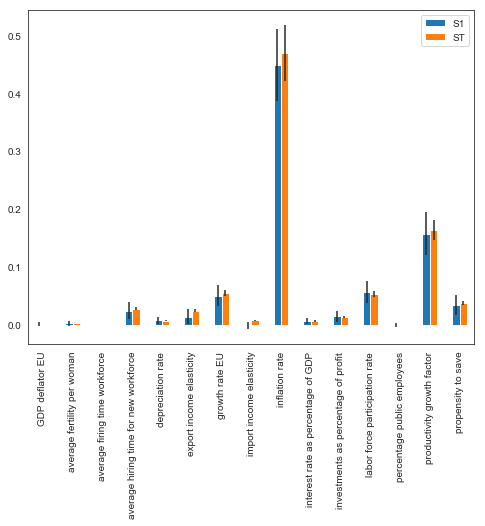

In [43]:
#unemployment rate
plot_scores(scores1)
plt.show()

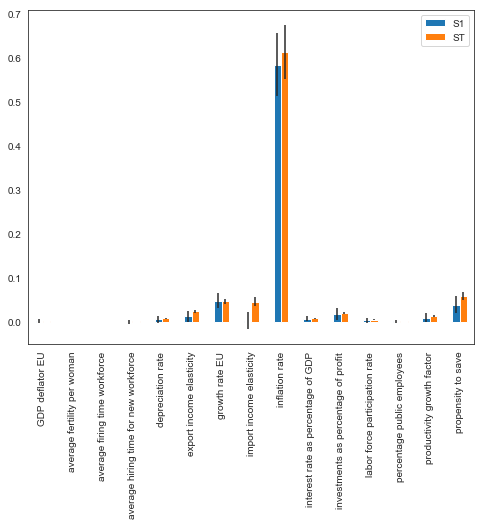

In [44]:
#real GDP
plot_scores(scores2)
plt.show()

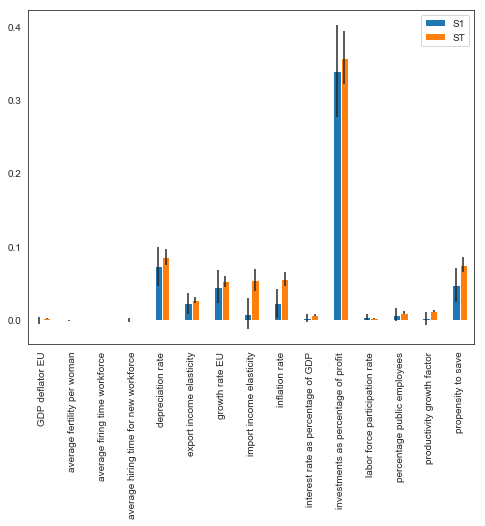

In [45]:
#Gross capital formation companies
plot_scores(scores3)
plt.show()

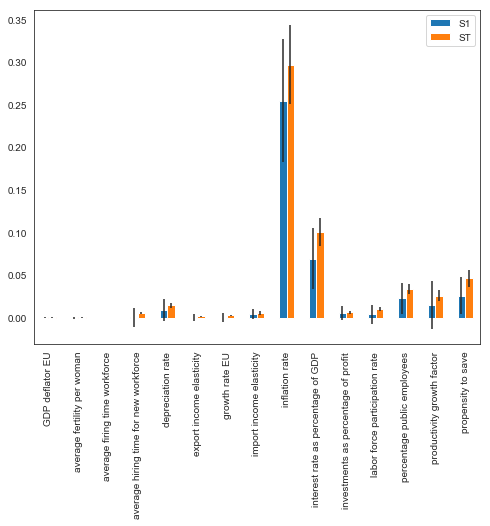

In [46]:
#gross capital formation government
plot_scores(scores4)
plt.show()

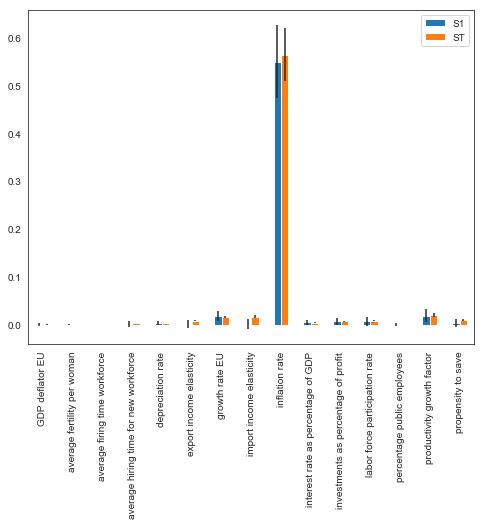

In [47]:
#real disposable income
plot_scores(scores5)
plt.show()

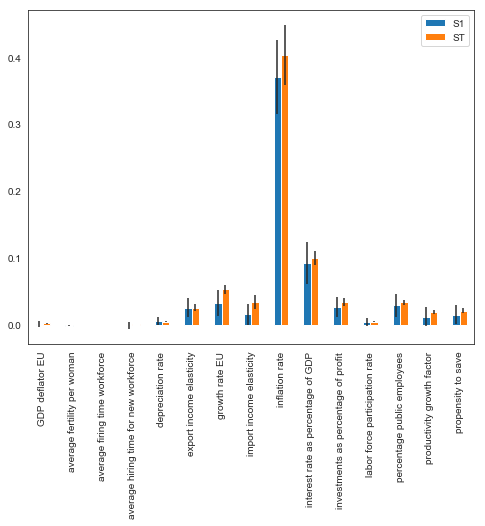

In [48]:
#Public Budget Balance including interest payments
plot_scores(scores6)
plt.show()

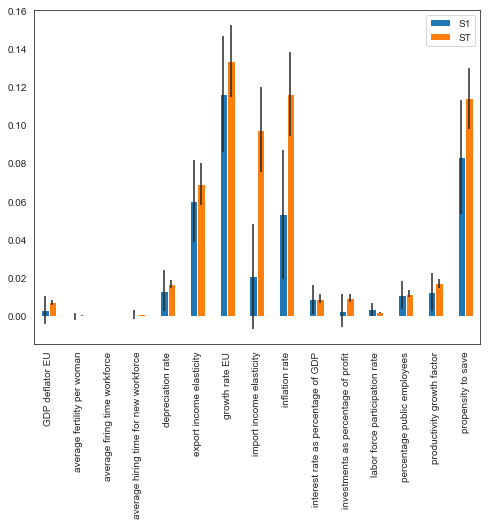

In [49]:
#profit
plot_scores(scores7)
plt.show()

In [50]:
sobol_scores1 = pd.DataFrame(list(zip(sobol_problem['names'], scores1['ST'])))

In [51]:
#unemployment rate
DFSobol1 = pd.DataFrame(sobol_scores1)
DFSobol1

,0,1
0,GDP deflator EU,0.001931
1,average fertility per woman,0.002731
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.027750
4,depreciation rate,0.006873
5,export income elasticity,0.024826
6,growth rate EU,0.055457
7,import income elasticity,0.008054
8,inflation rate,0.469742
9,interest rate as percentage of GDP,0.006772


In [52]:
#real GDP
sobol_scores2 = pd.DataFrame(list(zip(sobol_problem['names'], scores2['ST'])))
DFSobol2 = pd.DataFrame(sobol_scores2)
DFSobol2

,0,1
0,GDP deflator EU,0.002366
1,average fertility per woman,0.000073
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.001984
4,depreciation rate,0.007874
5,export income elasticity,0.024250
6,growth rate EU,0.047072
7,import income elasticity,0.046036
8,inflation rate,0.613791
9,interest rate as percentage of GDP,0.008132


In [53]:
#gross capital formation companies
sobol_scores3 = pd.DataFrame(list(zip(sobol_problem['names'], scores3['ST'])))
DFSobol3 = pd.DataFrame(sobol_scores3)
DFSobol3

,0,1
0,GDP deflator EU,0.002509
1,average fertility per woman,0.000142
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.001082
4,depreciation rate,0.085772
5,export income elasticity,0.027443
6,growth rate EU,0.052685
7,import income elasticity,0.054908
8,inflation rate,0.056182
9,interest rate as percentage of GDP,0.006392


In [54]:
#gross capital formation government
sobol_scores4 = pd.DataFrame(list(zip(sobol_problem['names'], scores4['ST'])))
DFSobol4 = pd.DataFrame(sobol_scores4)
DFSobol4

,0,1
0,GDP deflator EU,0.000147
1,average fertility per woman,0.000150
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.005398
4,depreciation rate,0.014432
5,export income elasticity,0.001400
6,growth rate EU,0.002701
7,import income elasticity,0.005412
8,inflation rate,0.297085
9,interest rate as percentage of GDP,0.100528


In [55]:
#real disposable income
sobol_scores5 = pd.DataFrame(list(zip(sobol_problem['names'], scores5['ST'])))
DFSobol5 = pd.DataFrame(sobol_scores5)
DFSobol5

,0,1
0,GDP deflator EU,0.000729
1,average fertility per woman,0.000117
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.003439
4,depreciation rate,0.003293
5,export income elasticity,0.007964
6,growth rate EU,0.015959
7,import income elasticity,0.016530
8,inflation rate,0.565075
9,interest rate as percentage of GDP,0.004720


In [56]:
#public budget balance including interest payments
sobol_scores6 = pd.DataFrame(list(zip(sobol_problem['names'], scores6['ST'])))
DFSobol6 = pd.DataFrame(sobol_scores6)
DFSobol6

,0,1
0,GDP deflator EU,2.661625e-03
1,average fertility per woman,1.815236e-04
2,average firing time workforce,1.781289e-18
3,average hiring time for new workforce,2.147229e-03
4,depreciation rate,5.473847e-03
5,export income elasticity,2.641433e-02
6,growth rate EU,5.380930e-02
7,import income elasticity,3.495380e-02
8,inflation rate,4.032875e-01
9,interest rate as percentage of GDP,1.003666e-01


In [57]:
#profit
sobol_scores7 = pd.DataFrame(list(zip(sobol_problem['names'], scores7['ST'])))
DFSobol7 = pd.DataFrame(sobol_scores7)
DFSobol7

,0,1
0,GDP deflator EU,0.007164
1,average fertility per woman,0.000326
2,average firing time workforce,0.000000
3,average hiring time for new workforce,0.001028
4,depreciation rate,0.017015
5,export income elasticity,0.069074
6,growth rate EU,0.133558
7,import income elasticity,0.097721
8,inflation rate,0.116311
9,interest rate as percentage of GDP,0.009243


In [58]:
n_scenarios = 500


experiments2, outcomes2 = perform_experiments(vensimModel,n_scenarios,policies=policies,uncertainty_sampling=SOBOL)

start_time = timeit.default_timer()



elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", elapsed/60)
  

[MainProcess/INFO] performing 16000 scenarios * 2 policies * 1 model(s) = 32000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] 19200 cases completed
[MainProcess/INFO] 22400 cases completed
[MainProcess/INFO] 25600 cases completed
[MainProcess/INFO] 28800 cases completed
[MainProcess/INFO] 32000 cases completed
[MainProcess/INFO] experiments finished


Total time in minutes: 4.216666760233542e-06


# 7. Scenario discovery-Prim

In [3]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import prim, dimensional_stacking, feature_scoring
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [4]:
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot

In [5]:
#loading the results from the visualization
file_name = "results.tar.gz"
experiments1, outcomes1 = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\anton\Downloads\Final Model\results.tar.gz


In [6]:
len(experiments1)

10000

In [7]:
len(outcomes1)

8

In [8]:
#transforming the names of the policies in integers
experiments1["policy"] = experiments1["policy"].apply(lambda x: 0 if x == "Lower taxes" else 1)

In [10]:
experiments1.head()

,GDP deflator EU,average fertility per woman,average firing time workforce,average hiring time for new workforce,depreciation rate,export income elasticity,growth rate EU,import income elasticity,inflation rate,interest rate as percentage of GDP,...,percentage public employees,productivity growth factor,propensity to save,scenario,policy,model,corporate profit tax rate,tax rate on personal income,value added tax rate,public investments as a ratio of public budget balance
0,1.191612,2.014253,1.379118,0.696154,0.085333,1.083098,0.011358,1.771084,0.015198,0.023417,...,0.115090,0.018769,0.050368,0,0,WholeModel13,0.25,0.2,0.2,0.4
1,1.090083,1.695860,1.351523,0.619484,0.107897,1.307124,0.011292,1.841893,0.015358,0.047201,...,0.107235,-0.003757,0.050269,1,0,WholeModel13,0.25,0.2,0.2,0.4
2,1.168321,1.326917,1.044085,0.698153,0.083451,1.657914,0.012574,1.627506,0.024675,0.017238,...,0.161353,0.009439,0.090902,2,0,WholeModel13,0.25,0.2,0.2,0.4
3,1.117000,1.483582,1.261830,0.653984,0.109954,1.839843,0.027735,1.226272,0.021531,0.031643,...,0.168605,0.002397,0.050791,3,0,WholeModel13,0.25,0.2,0.2,0.4
4,1.011631,1.526284,1.229737,0.761291,0.110125,1.147425,0.027126,1.869135,0.019290,0.034001,...,0.101100,-0.005247,0.065856,4,0,WholeModel13,0.25,0.2,0.2,0.4


In [11]:
type(outcomes1)

dict

In [ ]:
#Unemployment scores

In [30]:
un=pd.DataFrame(outcomes1['unemployment rate'][:,-1])
mergeDF = pd.concat([un,experiments1], axis=1)

In [36]:
mergeDF[mergeDF["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean        0.281267
std         0.171608
min         0.021911
25%         0.137405
50%         0.243410
75%         0.400726
max         0.825865
Name: 0, dtype: float64

In [35]:
mergeDF[mergeDF["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean        0.393400
std         0.190847
min         0.040055
25%         0.230556
50%         0.383315
75%         0.541341
max         0.862171
Name: 0, dtype: float64

In [ ]:
#real GDP scores

In [37]:
gdp=pd.DataFrame(outcomes1['real GDP'][:,-1])
mergeDF1 = pd.concat([gdp,experiments1], axis=1)

In [39]:
mergeDF1[mergeDF1["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean      288.540320
std       152.016328
min        64.498680
25%       176.350855
50%       251.080330
75%       361.796388
max      1314.416600
Name: 0, dtype: float64

In [40]:
mergeDF1[mergeDF["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean      200.971240
std       103.805743
min        50.876015
25%       124.344610
50%       175.222010
75%       251.226165
max       903.664550
Name: 0, dtype: float64

In [ ]:
#Real disposable income scores

In [41]:
income=pd.DataFrame(outcomes1['real disposable income'][:,-1])
mergeDF2 = pd.concat([income,experiments1], axis=1)

In [42]:
mergeDF2[mergeDF2["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean      788.403799
std       329.458701
min       235.327090
25%       527.919960
50%       720.353580
75%       997.978167
max      2288.462400
Name: 0, dtype: float64

In [45]:
mergeDF2[mergeDF2["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean      512.395825
std       225.564869
min       140.818770
25%       340.075645
50%       458.439870
75%       647.570287
max      1534.753800
Name: 0, dtype: float64

In [ ]:
#gross capital formation companies scores

In [47]:
companies=pd.DataFrame(outcomes1['Gross capital formation companies'][:,-1])
mergeDF3 = pd.concat([companies,experiments1], axis=1)

In [48]:
mergeDF3[mergeDF3["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean      162.656378
std        78.294524
min        36.380890
25%       106.430113
50%       146.467340
75%       201.263220
max       707.261900
Name: 0, dtype: float64

In [49]:
mergeDF3[mergeDF3["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean       91.485988
std        46.479530
min        16.112116
25%        58.028703
50%        81.630417
75%       113.313673
max       405.559420
Name: 0, dtype: float64

In [ ]:
#gross capital formation government scores

In [50]:
gov=pd.DataFrame(outcomes1['gross capital formation government'][:,-1])
mergeDF4 = pd.concat([gov,experiments1], axis=1)

In [51]:
mergeDF4[mergeDF4["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean        1.474059
std         5.431921
min         0.127712
25%         0.250831
50%         0.421198
75%         0.690535
max        91.480700
Name: 0, dtype: float64

In [ ]:
mergeDF4[mergeDF4[""]]

In [59]:
mergeDF4[mergeDF4["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean       13.751065
std        24.943764
min         0.707305
25%         3.040896
50%         5.099920
75%        10.285163
max       255.253110
Name: 0, dtype: float64

In [ ]:
#public budget balance scores

In [53]:
budget=pd.DataFrame(outcomes1['Public Budget Balance including interest payments'][:,-1])
mergeDF5 = pd.concat([budget,experiments1], axis=1)

In [97]:
mergeDF5[mergeDF5['policy']==1][(mergeDF5[0]>0) & (mergeDF5['inflation rate']>0.006)]

C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0,GDP deflator EU,average fertility per woman,average firing time workforce,average hiring time for new workforce,depreciation rate,export income elasticity,growth rate EU,import income elasticity,inflation rate,...,percentage public employees,productivity growth factor,propensity to save,scenario,policy,model,corporate profit tax rate,tax rate on personal income,value added tax rate,public investments as a ratio of public budget balance
5390,2.411881,1.177560,2.065219,1.168622,0.624707,0.084403,1.923200,0.017595,1.237081,0.006245,...,0.110450,0.029655,0.083586,390,1,WholeModel13,0.35,0.4,0.25,0.8
5461,6.534065,1.135980,1.729155,1.074672,0.850076,0.103070,1.374868,0.021381,1.563904,0.006043,...,0.178348,0.027045,0.056381,461,1,WholeModel13,0.35,0.4,0.25,0.8
5758,0.727959,1.019878,1.517548,1.185372,0.682590,0.091605,1.077002,0.016924,1.529712,0.009009,...,0.143393,0.022124,0.053771,758,1,WholeModel13,0.35,0.4,0.25,0.8
6076,1.806053,1.018449,1.506615,1.389991,0.980983,0.109076,1.057910,0.017440,1.349513,0.006286,...,0.148111,0.019075,0.057106,1076,1,WholeModel13,0.35,0.4,0.25,0.8
6135,4.168350,1.105030,1.556524,1.411043,0.521416,0.087053,1.086980,0.021348,1.304357,0.007737,...,0.138520,0.022349,0.057952,1135,1,WholeModel13,0.35,0.4,0.25,0.8
6192,0.167427,1.088209,1.729697,1.447449,0.787407,0.123483,1.590197,0.028318,1.853655,0.007787,...,0.123106,0.015436,0.057327,1192,1,WholeModel13,0.35,0.4,0.25,0.8
6217,0.666458,1.030162,1.339542,1.142859,0.847942,0.087255,1.323068,0.010689,1.001083,0.006404,...,0.192317,0.028867,0.059923,1217,1,WholeModel13,0.35,0.4,0.25,0.8
6226,2.762444,1.174546,2.089801,1.145399,0.723167,0.082827,1.118974,0.011853,1.703795,0.006288,...,0.102367,0.014278,0.066427,1226,1,WholeModel13,0.35,0.4,0.25,0.8
6237,3.034683,1.155416,1.277346,1.130947,0.740114,0.091067,1.015041,0.013570,1.783317,0.008735,...,0.106301,0.019172,0.051503,1237,1,WholeModel13,0.35,0.4,0.25,0.8
6458,3.761734,1.081442,1.699800,1.037973,0.557795,0.110155,1.249468,0.020093,1.659367,0.007210,...,0.126153,0.009852,0.060136,1458,1,WholeModel13,0.35,0.4,0.25,0.8


In [54]:
mergeDF5[mergeDF5["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean      -23.999388
std        12.034727
min       -80.299225
25%       -30.535736
50%       -23.585062
75%       -17.544052
max        24.584290
Name: 0, dtype: float64

In [55]:
mergeDF5[mergeDF5["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean      -14.411407
std        11.287160
min       -53.644780
25%       -20.970758
50%       -15.797211
75%        -8.858203
max        34.440720
Name: 0, dtype: float64

In [ ]:
#profit scores

In [56]:
profit=pd.DataFrame(outcomes1['profit'][:,-1])
mergeDF6 = pd.concat([profit,experiments1], axis=1)

In [57]:
mergeDF6[mergeDF6["policy"]==0].iloc[:,0].describe()

count    5000.000000
mean       63.634750
std        25.839260
min        19.768976
25%        45.139427
50%        57.934376
75%        76.071165
max       260.226350
Name: 0, dtype: float64

In [58]:
mergeDF6[mergeDF6["policy"]==1].iloc[:,0].describe()

count    5000.000000
mean       37.046975
std        17.800568
min         6.708580
25%        24.133697
50%        33.175761
75%        45.926327
max       145.206530
Name: 0, dtype: float64

In [21]:
#exp=pd.DataFrame(experiments)
#out=pd.DataFrame.from_dict(outcomes['real GDP'])

In [22]:
experiments2=experiments1.drop(columns=['policy','model','corporate profit tax rate','tax rate on personal income','value added tax rate','public investments as a ratio of public budget balance'])

In [23]:
experiments2.head()

,GDP deflator EU,average fertility per woman,average firing time workforce,average hiring time for new workforce,depreciation rate,export income elasticity,growth rate EU,import income elasticity,inflation rate,interest rate as percentage of GDP,investments as percentage of profit,labor force participation rate,percentage public employees,productivity growth factor,propensity to save,scenario
0,1.191612,2.014253,1.379118,0.696154,0.085333,1.083098,0.011358,1.771084,0.015198,0.023417,0.393776,0.725384,0.115090,0.018769,0.050368,0
1,1.090083,1.695860,1.351523,0.619484,0.107897,1.307124,0.011292,1.841893,0.015358,0.047201,0.278689,0.769741,0.107235,-0.003757,0.050269,1
2,1.168321,1.326917,1.044085,0.698153,0.083451,1.657914,0.012574,1.627506,0.024675,0.017238,0.407199,0.716108,0.161353,0.009439,0.090902,2
3,1.117000,1.483582,1.261830,0.653984,0.109954,1.839843,0.027735,1.226272,0.021531,0.031643,0.304713,0.750244,0.168605,0.002397,0.050791,3
4,1.011631,1.526284,1.229737,0.761291,0.110125,1.147425,0.027126,1.869135,0.019290,0.034001,0.444260,0.722097,0.101100,-0.005247,0.065856,4


In [24]:
y_un= np.mean(outcomes1['unemployment rate'],axis=1)
pdy1=pd.DataFrame(y_un).describe([0.25,0.75])
pdy1

,0
count,10000.000000
mean,0.333099
std,0.114352
min,0.081883
25%,0.241247
50%,0.321064
75%,0.416772
max,0.680012


(array([  3.,  29., 110., 256., 415., 532., 528., 633., 628., 641., 623.,
        604., 556., 553., 539., 473., 468., 430., 418., 331., 316., 252.,
        199., 168., 123.,  72.,  54.,  30.,  12.,   4.]),
 array([0.08188281, 0.10182045, 0.1217581 , 0.14169574, 0.16163338,
        0.18157103, 0.20150867, 0.22144632, 0.24138396, 0.26132161,
        0.28125925, 0.3011969 , 0.32113454, 0.34107219, 0.36100983,
        0.38094748, 0.40088512, 0.42082276, 0.44076041, 0.46069805,
        0.4806357 , 0.50057334, 0.52051099, 0.54044863, 0.56038628,
        0.58032392, 0.60026157, 0.62019921, 0.64013686, 0.6600745 ,
        0.68001215]),
 <a list of 30 Patch objects>)

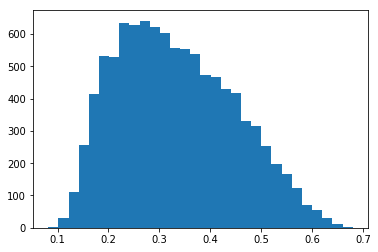

In [25]:
plt.hist(y_un, bins=30)

In [26]:
#unemployment, high 25%
y1_outcome = y_un >0.41

In [27]:
prim_alg = prim.Prim(experiments2, y1_outcome, threshold=0.9, peel_alpha=0.1)
box1= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2657 cases of interest
[MainProcess/INFO] mean: 0.9370229007633588, mass: 0.0524, coverage: 0.18479488144523898, density: 0.9370229007633588 restricted_dimensions: 5


In [28]:
#experiments2["outcome"] = y1_outcome

In [29]:
#sns.pairplot(experiments2, hue="outcome")

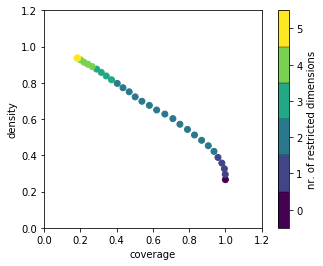

In [30]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

coverage    0.710199
density      0.60249
id                11
mass          0.3132
mean         0.60249
res_dim            2
Name: 11, dtype: object

                              box 11            \
                                 min       max   
inflation rate              0.015701  0.029994   
productivity growth factor  0.003990  0.029999   

                                                             
                                                  qp values  
inflation rate              [2.5675660525480713e-183, -1.0]  
productivity growth factor    [2.942454275410686e-49, -1.0]  



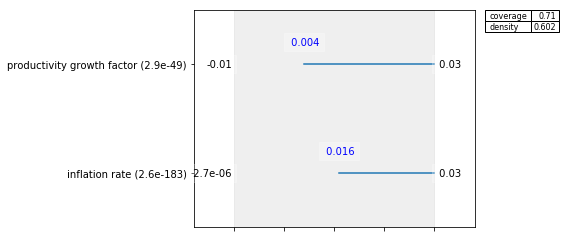

In [144]:
#unemployment rate
n_box = 11
box1.inspect(n_box)
box1.inspect(n_box, style='graph')
plt.show()

In [32]:
# box1.select(10)
# fig = box1.show_pairs_scatter()
# #fig.set_size_inches(12,12)
# plt.show()

In [33]:
y_real= np.mean(outcomes1['real GDP'],axis=1)
pdy2=pd.DataFrame(y_real).describe([0.25,0.9])
pdy2

,0
count,10000.000000
mean,216.978271
std,68.598431
min,95.591872
25%,165.850945
50%,202.120403
90%,312.099129
max,614.769211


In [34]:
#real GDP,low 25%
y2_outcome= y_real<165

In [35]:
y_high=y_real> 300

In [36]:
prim_alg = prim.Prim(experiments2, y_high, threshold=0.75, peel_alpha=0.1)
box8= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 1220 cases of interest
[MainProcess/INFO] mean: 0.7577519379844961, mass: 0.0516, coverage: 0.32049180327868854, density: 0.7577519379844961 restricted_dimensions: 3


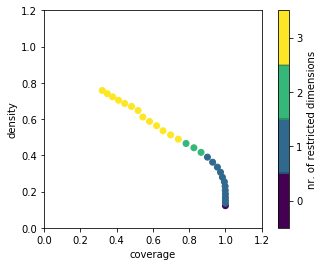

In [37]:
import matplotlib.pyplot as plt
 
box8.show_tradeoff()
plt.show()

coverage    0.655738
density     0.535475
id                18
mass          0.1494
mean        0.535475
res_dim            3
Name: 18, dtype: object

                            box 18                                          
                               min       max                       qp values
inflation rate            0.000003  0.005479  [-1.0, 8.288062257574436e-283]
propensity to save        0.050004  0.094623    [-1.0, 0.030985289671700843]
import income elasticity  1.000168  1.895135    [-1.0, 0.041612848253826204]



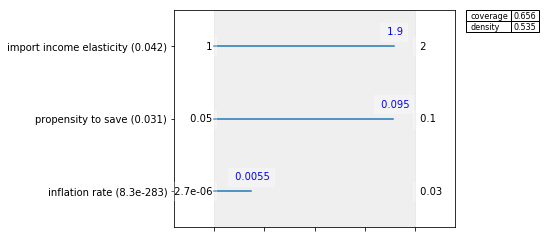

In [92]:
n_box = 18
box8.inspect(n_box)
box8.inspect(n_box, style='graph')
plt.show()

In [39]:
#plt.hist(y2, bins=30)

In [93]:
prim_alg = prim.Prim(experiments2, y2_outcome, threshold=0.88, peel_alpha=0.1)
box2= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2423 cases of interest
[MainProcess/INFO] mean: 0.8895348837209303, mass: 0.0516, coverage: 0.1894345852249278, density: 0.8895348837209303 restricted_dimensions: 3


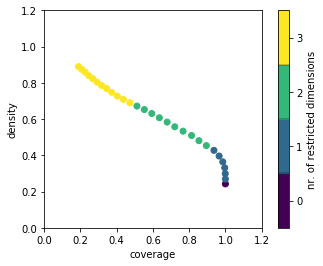

In [94]:
import matplotlib.pyplot as plt
 
box2.show_tradeoff()
plt.show()

coverage    0.635576
density     0.607256
id                13
mass          0.2536
mean        0.607256
res_dim            2
Name: 13, dtype: object

                  box 13                                           
                     min       max                        qp values
growth rate EU  0.010003  0.022984    [-1.0, 7.522940558370013e-29]
inflation rate  0.018401  0.029994  [2.5766231702099278e-216, -1.0]



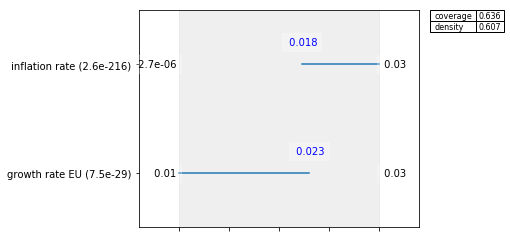

In [100]:
#real GDP
n_box = 13
box2.inspect(n_box)
box2.inspect(n_box, style='graph')
plt.show()

In [101]:
y_comp= np.mean(outcomes1['Gross capital formation companies'],axis=1)
pdy3=pd.DataFrame(y_comp).describe([0.25])
pdy3

,0
count,10000.000000
mean,60.520712
std,27.206224
min,14.149213
25%,40.534118
50%,54.695882
max,233.325430


In [102]:
#Gross capital formation companies,low 25%  
y3_outcome=y_comp <40

[MainProcess/INFO] 10000 points remaining, containing 2387 cases of interest
[MainProcess/INFO] mean: 0.7674418604651163, mass: 0.0516, coverage: 0.16589861751152074, density: 0.7674418604651163 restricted_dimensions: 6


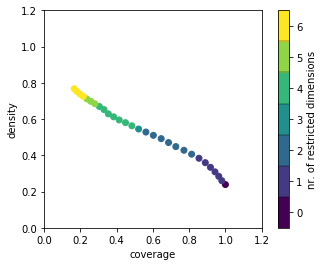

In [103]:
prim_alg = prim.Prim(experiments2, y3_outcome, threshold=0.75, peel_alpha=0.1)
box3= prim_alg.find_box()
box3.show_tradeoff()
plt.show()

coverage     0.60243
density     0.510291
id                12
mass          0.2818
mean        0.510291
res_dim            2
Name: 12, dtype: object

                                       box 12            \
                                          min       max   
investments as percentage of profit  0.200019  0.304277   
depreciation rate                    0.084504  0.124995   

                                                                     
                                                          qp values  
investments as percentage of profit  [-1.0, 8.742455489953378e-164]  
depreciation rate                     [4.551066495290105e-06, -1.0]  



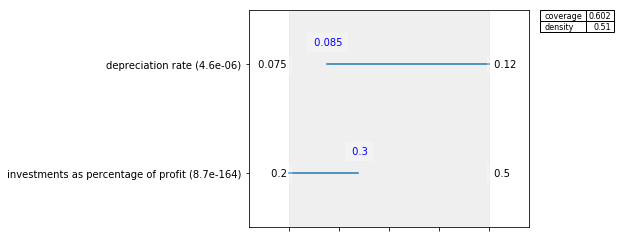

In [106]:
#gross capital formation companies
n_box = 12
box3.inspect(n_box)
box3.inspect(n_box, style='graph')
plt.show()

In [47]:
y_gov= np.mean(outcomes1['gross capital formation government'],axis=1)
pdy4=pd.DataFrame(y_gov).describe([0.25])
pdy4

,0
count,10000.000000
mean,16.832793
std,17.900807
min,1.892339
25%,2.727046
50%,12.579224
max,145.690805


In [48]:
#gross capital formation government,low 25%
y4_outcome=y_gov < 15

[MainProcess/INFO] 10000 points remaining, containing 5406 cases of interest
[MainProcess/INFO] mean: 0.8992248062015504, mass: 0.0516, coverage: 0.08583055863854976, density: 0.8992248062015504 restricted_dimensions: 5


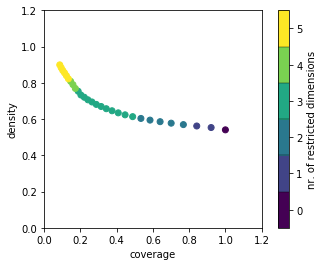

In [49]:
prim_alg = prim.Prim(experiments2, y4_outcome, threshold=0.6, peel_alpha=0.1)
box4= prim_alg.find_box()
box4.show_tradeoff()
plt.show()

coverage    0.768036
density     0.569547
id                 3
mass           0.729
mean        0.569547
res_dim            2
Name: 3, dtype: object

                                       box 3            \
                                         min       max   
inflation rate                      0.005700  0.029994   
interest rate as percentage of GDP  0.014046  0.049996   

                                                                    
                                                         qp values  
inflation rate                      [0.00024287784343977694, -1.0]  
interest rate as percentage of GDP     [0.09461939227585518, -1.0]  



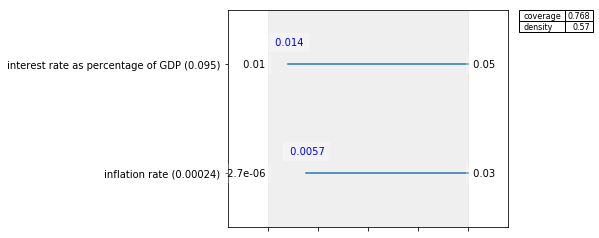

In [138]:
#gross capital formation government
n_box = 3
box4.inspect(n_box)
box4.inspect(n_box, style='graph')
plt.show()

In [51]:
y_inc= np.mean(outcomes1['real disposable income'],axis=1)
pdy5=pd.DataFrame(y_inc).describe([0.25])
pdy5

,0
count,10000.000000
mean,407.794580
std,136.350344
min,148.943767
25%,304.726715
50%,388.009454
max,986.030654


In [117]:
#real disposable income,low 25%
y5_outcome=y_inc <304

[MainProcess/INFO] 10000 points remaining, containing 2477 cases of interest
[MainProcess/INFO] mean: 0.6550387596899225, mass: 0.0516, coverage: 0.1364553895841744, density: 0.6550387596899225 restricted_dimensions: 5


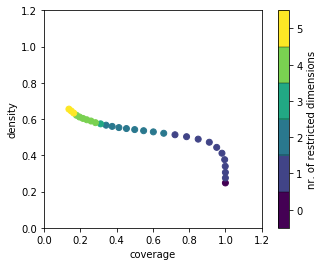

In [119]:
prim_alg = prim.Prim(experiments2, y5_outcome, threshold=0.65, peel_alpha=0.1)
box5= prim_alg.find_box()
box5.show_tradeoff()
plt.show()

coverage    0.721841
density     0.513498
id                10
mass          0.3482
mean        0.513498
res_dim            1
Name: 10, dtype: object

                  box 10                                           
                     min       max                        qp values
inflation rate  0.019552  0.029994  [2.4027375643357115e-247, -1.0]



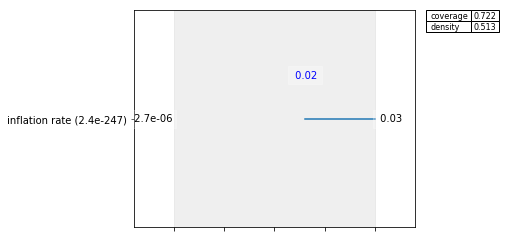

In [120]:
#real disposable income
n_box = 10
box5.inspect(n_box)
box5.inspect(n_box, style='graph')
plt.show()

In [121]:
box5.inspect(n_box, 'table')

coverage    0.721841
density     0.513498
id                10
mass          0.3482
mean        0.513498
res_dim            1
Name: 10, dtype: object

                  box 10                                           
                     min       max                        qp values
inflation rate  0.019552  0.029994  [2.4027375643357115e-247, -1.0]



In [122]:
y_budg= np.mean(outcomes1['Public Budget Balance including interest payments'],axis=1)
pdy6=pd.DataFrame(y_budg).describe([0.25])
pdy6

,0
count,10000.000000
mean,-5.514757
std,7.467118
min,-30.391568
25%,-10.639685
50%,-6.020468
max,25.283522


In [128]:
#Public Budget Balance including interest payments,low 25%
y6_outcome=y_budg <-6

[MainProcess/INFO] 10000 points remaining, containing 5010 cases of interest
[MainProcess/INFO] mean: 0.9928571428571429, mass: 0.056, coverage: 0.11097804391217565, density: 0.9928571428571429 restricted_dimensions: 5


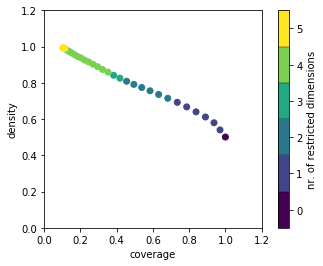

In [129]:
prim_alg = prim.Prim(experiments2, y6_outcome, threshold=0.75, peel_alpha=0.1)
box6= prim_alg.find_box()
box6.show_tradeoff()
plt.show()

coverage    0.682036
density     0.714854
id                 7
mass           0.478
mean        0.714854
res_dim            2
Name: 7, dtype: object

                                       box 7            \
                                         min       max   
inflation rate                      0.014063  0.029994   
interest rate as percentage of GDP  0.013782  0.049996   

                                                                    
                                                         qp values  
inflation rate                      [4.937635262094964e-166, -1.0]  
interest rate as percentage of GDP   [0.0004152501488185453, -1.0]  



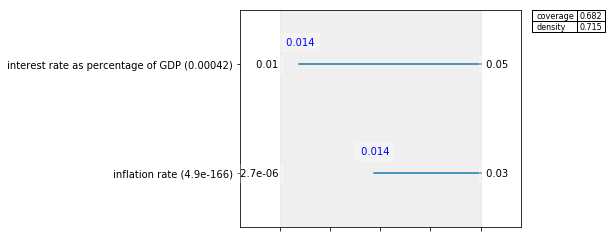

In [133]:
#public budget balance
n_box =7
box6.inspect(n_box)
box6.inspect(n_box, style='graph')
plt.show()

In [134]:
y_prof= np.mean(outcomes1['profit'],axis=1)
pdy7=pd.DataFrame(y_prof).describe([0.25])
pdy7

,0
count,10000.000000
mean,26.927576
std,10.487106
min,7.116694
25%,18.738232
50%,25.664175
max,96.314521


In [72]:
#profit, low 25%
y7_outcome=y_prof <25

[MainProcess/INFO] 10000 points remaining, containing 4746 cases of interest
[MainProcess/INFO] mean: 0.9224806201550387, mass: 0.0516, coverage: 0.10029498525073746, density: 0.9224806201550387 restricted_dimensions: 5


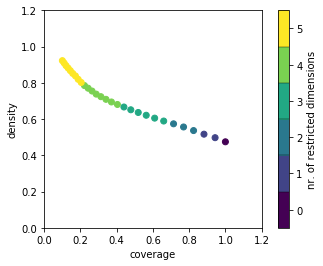

In [74]:
prim_alg = prim.Prim(experiments2, y7_outcome, threshold=0.9, peel_alpha=0.1)
box7= prim_alg.find_box()
box7.show_tradeoff()
plt.show()

coverage    0.609566
density      0.60523
id                 7
mass           0.478
mean         0.60523
res_dim            3
Name: 7, dtype: object

                       box 7                                          
                         min       max                       qp values
growth rate EU      0.010003  0.023144  [-1.0, 1.3394029526691402e-29]
propensity to save  0.059783  0.099994   [5.735857806328924e-06, -1.0]
inflation rate      0.002969  0.029994    [0.005085407225167938, -1.0]



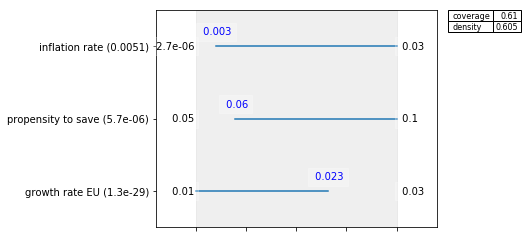

In [81]:
#profit
n_box = 7
box7.inspect(n_box)
box7.inspect(n_box, style='graph')
plt.show()